# Air distance vs Walking distance

This small visualisation is an extension of [SF Streets and Muni Stops](https://github.com/HerTeoh/spatial_data/blob/master/SF%20Streets%20and%20Muni%20Stops/SF%20Streets%20and%20Muni%20Stops.ipynb) where San Francisco Muni stops were plotted. The comparison in that notebook was between a 400m and 524m buffer zone which was used to determine how public transit friendly San Francisco is based on literature about walking distance to transit stops. 

This extension makes a comparison between air distance and walking distance. It suggests that a simple buffer radii does not adequately reflect the distance to transit

## Required Libraries

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
from seaborn import palplot
import osmnx as ox
import mplleaflet

%matplotlib inline

## Load in Data

In [2]:
# directory
bs_dir = "San Francisco Basemap Street Centerlines/"
# the shapefile for San Francisco streets
baseline_streets_link = "geo_export_0274863a-ce2d-4ea1-953d-d8abb0efac14.shp"
baseline_streets = gpd.read_file(bs_dir + baseline_streets_link)
baseline_streets.head()

,accepted,classcode,cnn,cnntext,district,f_node_cnn,jurisdicti,layer,lf_fadd,lf_toadd,...,oneway,rt_fadd,rt_toadd,st_type,street,street_gc,streetname,t_node_cnn,zip_code,geometry
0,N,0,15145000.0,15145000,,26132000.0,,PRIVATE,0.0,0.0,...,B,0.0,0.0,CT,CROWN,CROWN,CROWN CT,54223000.0,94114,LINESTRING (-122.4469424451799 37.757228921523...
1,Y,0,11305001.0,11305001,,26255000.0,DPW,UPROW,1.0,37.0,...,B,2.0,36.0,AVE,SAINT GERMAIN,SAINT GERMAIN,SAINT GERMAIN AVE,54224000.0,94114,LINESTRING (-122.4479152656158 37.757589498018...
2,Y,5,11305002.0,11305002,,54224000.0,DPW,STREETS,39.0,99.0,...,B,38.0,98.0,AVE,SAINT GERMAIN,SAINT GERMAIN,SAINT GERMAIN AVE,26247000.0,94114,LINESTRING (-122.4488770135246 37.757536327477...
3,Y,5,13798000.0,13798000,,35015000.0,DPW,STREETS,221.0,299.0,...,F,222.0,298.0,ST,CORONA,CORONA,CORONA ST,35015000.0,94127,LINESTRING (-122.4665977274102 37.725924475312...
4,N,5,5389001.0,5389001,,35016000.0,DPW,STREETS,1001.0,1099.0,...,B,1000.0,1098.0,AVE,FAIRFAX,FAIRFAX,FAIRFAX AVE,35017000.0,94124,LINESTRING (-122.3808508035504 37.736279384703...


In [3]:
# SFMTA GTFS stops data
stops = pd.read_csv('stops.txt', sep=",", header=0)
stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url
0,390,10390,19th Avenue & Holloway St,,37.721190,-122.475096,,
1,913,10913,DUBLIN ST & LAGRANDE AVE,,37.719192,-122.425802,,
2,3003,13003,2nd St & Brannan St,,37.781827,-122.391945,,
3,3004,13004,2nd St & Brannan St,,37.781854,-122.392232,,
4,3009,13009,2nd St & Harrison St,,37.784532,-122.395325,,


In [4]:
# zip the longitude and latitude data together to form a combined coordinates
stops['geometry'] = list(zip(stops.stop_lon, stops.stop_lat))

# use shapely to turn coordinates into Points
stops['geometry'] = stops['geometry'].apply(Point)

# convert the pandas dataframe into a geopandas dataframe
stops_gdf = gpd.GeoDataFrame(stops, geometry='geometry')
stops_gdf.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,geometry
0,390,10390,19th Avenue & Holloway St,,37.721190,-122.475096,,,POINT (-122.475096 37.72119)
1,913,10913,DUBLIN ST & LAGRANDE AVE,,37.719192,-122.425802,,,POINT (-122.425802 37.719192)
2,3003,13003,2nd St & Brannan St,,37.781827,-122.391945,,,POINT (-122.391945 37.781827)
3,3004,13004,2nd St & Brannan St,,37.781854,-122.392232,,,POINT (-122.392232 37.781854)
4,3009,13009,2nd St & Harrison St,,37.784532,-122.395325,,,POINT (-122.395325 37.784532)


In [5]:
# assign the crs of the data
stops_gdf.crs = {'init' :'epsg:4326'}
# convert it to epsg3174 that measures in meters
stops_gdf = stops_gdf.to_crs({'init': 'epsg:3174'})
stops_gdf.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,geometry
0,390,10390,19th Avenue & Holloway St,,37.721190,-122.475096,,,POINT (-2249913.667659364 912616.9315020253)
1,913,10913,DUBLIN ST & LAGRANDE AVE,,37.719192,-122.425802,,,POINT (-2246118.612584498 910428.9080820472)
2,3003,13003,2nd St & Brannan St,,37.781827,-122.391945,,,POINT (-2240302.610255989 915213.3662177322)
3,3004,13004,2nd St & Brannan St,,37.781854,-122.392232,,,POINT (-2240323.923023472 915227.5876938032)
4,3009,13009,2nd St & Harrison St,,37.784532,-122.395325,,,POINT (-2240433.931482567 915615.2912387213)


## Colour Blind Colour Palette

['#0072b2', '#009e73', '#d55e00', '#cc79a7', '#f0e442', '#56b4e9']

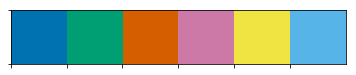

In [6]:
colorblind = sns.color_palette("colorblind")
palplot(colorblind)
colorblind.as_hex()

## 524m Air Distance Visualisation

In [7]:
buf_524 = stops_gdf.buffer(524)
# convert it back to epsg4326 to be in line with the crs of the streets
buf_524 = buf_524.to_crs({'init': 'epsg:4326'}) 
buf_524.head()

0    POLYGON ((-122.4698400431987 37.72335495136704...
1    POLYGON ((-122.4205445572649 37.72135436567951...
2    POLYGON ((-122.3866813307327 37.7839872882852,...
3    POLYGON ((-122.3869683381259 37.78401430327159...
4    POLYGON ((-122.3900612234059 37.78669245359092...
dtype: object

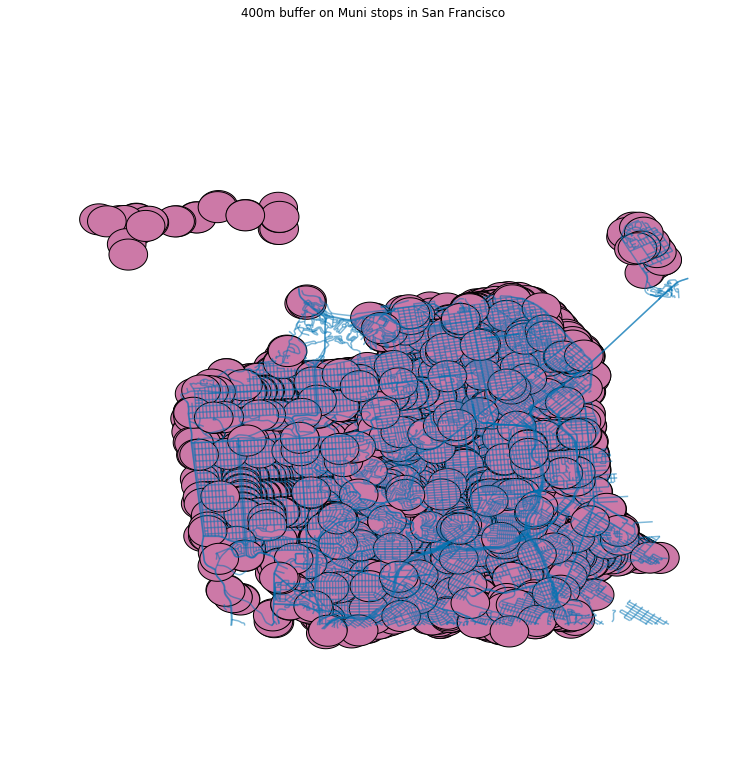

In [8]:
f, ax = plt.subplots(1, figsize=(12, 12))
baseline_streets.plot(ax=ax, color='#0072b2', alpha=0.5)
buf_524.plot(ax=ax, color = '#cc79a7', edgecolor='black')

f.suptitle('400m buffer on Muni stops in San Francisco')
ax.set_axis_off()
plt.axis('equal')
plt.show()

## Air Distance vs Walking Distance

In [13]:
'''
Picks out a muni stop location and uses osmnx that creates a shapefile
containing the walking distance of 524m from the muni stop.
'''
lat = stops_gdf['stop_lat'].iloc[5]
lon = stops_gdf['stop_lon'].iloc[5]
walk_distance = ox.graph_from_point((lat, lon), distance=524, distance_type='network', network_type='walk')
ox.save_graph_shapefile(walk_distance, filename='walking_distance_2')

In [14]:
'''
Retrieves thes shapefile that was created
'''
data_dir = '/Users/JiaHer/_Personal Work/Mapping SF/SF Streets and Muni Stops/data/walking_distance_2/edges/'
walking_distance_2_link = data_dir + 'edges.shp'
walking_distance_2 = gpd.read_file(walking_distance_2_link)
walking_distance_2 = walking_distance_2.to_crs({'init': 'epsg:4326'})

In [15]:
f, ax = plt.subplots(1, figsize=(20,20))
ax = walking_distance_2.plot(ax=ax)
ax = buf_524[5:6].plot(ax=ax)

mplleaflet.display(fig=f, crs=walking_distance_2.crs, tiles='cartodb_positron')

## Conclusion

This particular muni stop of interest because it illustrates very well the issues with using air distance as opposed to walking distance. The coverage area suggested by air disance is essentially halved by walking distance along both Brannan Street and Howard Street. Additionally, the freeway is identified as a road that is not walkable. This visualisation shows how misleading the measure for coverage can be depending on what types of analyses are used to determing the walking distance to transit.